In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv("C:/Users/HP/Downloads/Clustering_Data.csv")

In [3]:
data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [4]:
X = data.drop(columns=["Customer_Segment"]).values

In [5]:
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [7]:
#z-score normalization
X = (X - X.mean())/X.std()

In [8]:
X

array([[-0.25448264, -0.31251379, -0.30917653, ..., -0.31561929,
        -0.30227027,  4.61591591],
       [-0.25925676, -0.31218933, -0.3105207 , ..., -0.31557294,
        -0.30468051,  4.54638978],
       [-0.25944217, -0.30950099, -0.30806411, ..., -0.31566564,
        -0.30574657,  5.172125  ],
       ...,
       [-0.25893231, -0.30060164, -0.30996449, ..., -0.31770507,
        -0.31320905,  3.54984849],
       [-0.25939582, -0.30843492, -0.30945464, ..., -0.31765872,
        -0.31293094,  3.57302387],
       [-0.25494614, -0.30143595, -0.30773966, ..., -0.31761237,
        -0.31302364,  2.27520266]])

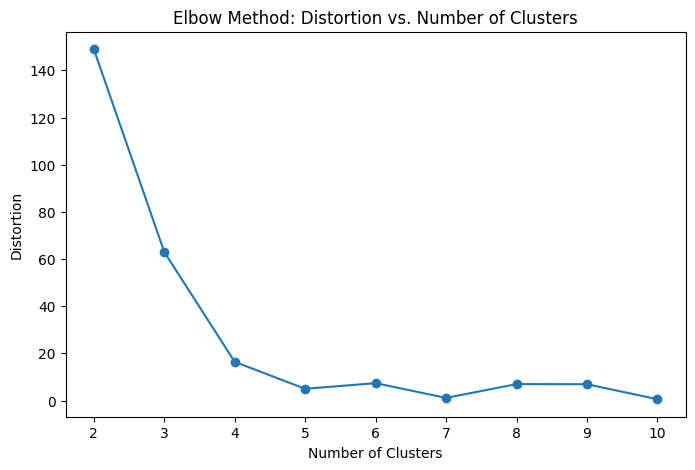

In [11]:
def sq_euc_dist(a, b):
    return np.sum((a - b)**2, axis=1)
# K-means clustering algorithm from scratch
def kmeans(X, k, max_iters=100):
    # Randomly initialize the centroids as k random points from the dataset
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]  # Ensure X is a NumPy array

    for i in range(max_iters):
        # Assign each data point to the closest centroid
        clusters = np.array([np.argmin(sq_euc_dist(x, centroids)) for x in X])
        
        # Calculate new centroids as the mean of points in each cluster
        new_centroids = np.array([X[clusters == j].mean(axis=0) for j in range(k)])
        
        # Check for convergence (i.e., if centroids do not change anymore)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids

    return clusters, centroids

# Function to find the optimal number of clusters using the Elbow method
def find_optimal_clusters(X, max_k=10):
    distortions = []
    
    for k in range(2, max_k + 1):
        clusters, centroids = kmeans(X, k)
        # Calculate distortion (sum of squared distances from points to centroids)
        distortions.append(np.sum([np.min(sq_euc_dist(x, centroids))**2 for x in X]))
    
    # Plot the elbow method (Distortion)
    plt.figure(figsize=(8, 5))
    plt.plot(range(2, max_k + 1), distortions, marker='o')
    plt.title('Elbow Method: Distortion vs. Number of Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Distortion')
    plt.show()

# Find the optimal number of clusters using the Elbow method
find_optimal_clusters(X, max_k=10)

In [25]:
optimal_k = 3 # k=3 based on the elbow graph

In [26]:
clusters, centroids = kmeans(X, optimal_k)

# Print the cluster centroids
print("Cluster Centers (Centroids):")
print(centroids)

Cluster Centers (Centroids):
[[-0.25645501 -0.31171004 -0.30919428 -0.241535    0.16861004 -0.30714992
  -0.30646846 -0.31911729 -0.3115848  -0.294008   -0.31544177 -0.30600594
   5.21916609]
 [-0.26242407 -0.30887895 -0.30983216 -0.22392271  0.1075994  -0.3108418
  -0.31228942 -0.31863141 -0.31371017 -0.30149641 -0.31607742 -0.30889507
   1.80349973]
 [-0.26050898 -0.30883339 -0.3092782  -0.22824661  0.15973913 -0.31065452
  -0.31309766 -0.31863956 -0.31347145 -0.29425009 -0.31634251 -0.30947557
   3.05546533]]


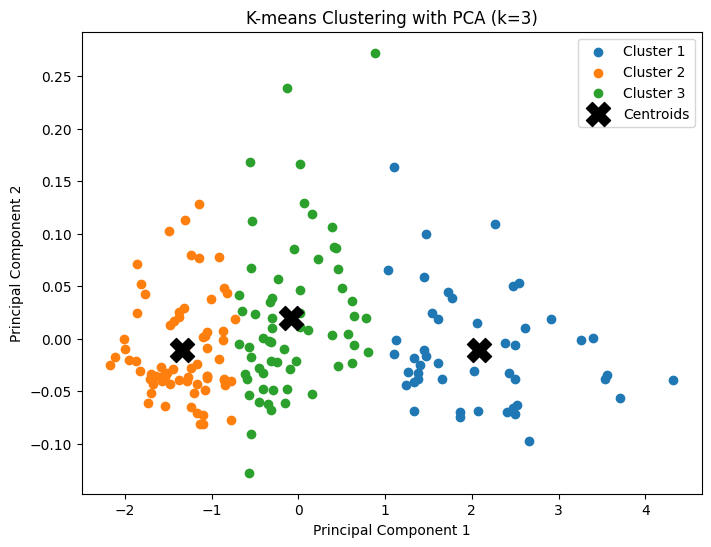

In [28]:
# PCA for visualization (reduce data to 2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the clusters
plt.figure(figsize=(8, 6))
for i in range(optimal_k):
    plt.scatter(X_pca[clusters == i, 0], X_pca[clusters == i, 1], label=f'Cluster {i+1}')
    
# Plot the cluster centroids (projected in PCA space)
centroids_pca = pca.transform(centroids)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=300, c='black', marker='X', label='Centroids')

plt.title('K-means Clustering with PCA (k=3)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()